# **Airbnb Listings Bangkok**
Dibuat oleh: *Akmal Raafid Taufiqurrahman*
- **Sumber Data: https://drive.google.com/drive/folders/1A_KBMRFTS5Mthpp46nulso679ML4ZwTF**

## **Content**

## **Business Understanding**

### **Latar Belakang**
Airbnb merupakan salah satu platform penyewaan properti jangka pendek yang sangat populer, terutama di kota-kota besar seperti Bangkok. Dengan ribuan listing yang tersedia, kompetisi antara pemilik properti semakin tinggi. Oleh karena itu, pemilik properti maupun calon investor perlu memahami bagaimana faktor-faktor seperti harga, lokasi, ketersediaan, dan ulasan memengaruhi tingkat hunian dan pendapatan dari properti mereka.

Dalam satu dekade terakhir, platform penyewaan jangka pendek seperti Airbnb telah mengubah cara orang memesan akomodasi dan cara individu memperoleh pendapatan dari properti mereka. Di kota-kota besar seperti Bangkok, yang merupakan salah satu destinasi wisata paling populer di dunia, Airbnb telah menjadi pilihan utama baik bagi wisatawan lokal maupun internasional.

Dengan meningkatnya jumlah listing dari tahun ke tahun, persaingan antar pemilik properti semakin ketat. Tidak hanya sekadar menyediakan tempat menginap, para host kini juga dituntut untuk menetapkan harga kompetitif, meningkatkan visibilitas, serta menjaga kualitas layanan agar tetap relevan di pasar. Di sisi lain, calon investor juga melihat Airbnb sebagai peluang usaha yang menjanjikan, terutama di lokasi-lokasi strategis dengan tingkat hunian tinggi.

Namun, tantangan yang muncul adalah bagaimana memahami faktor-faktor yang berpengaruh terhadap tingkat keberhasilan sebuah listing. Faktor seperti jenis kamar, lokasi geografis, jumlah ulasan, ketersediaan properti, serta harga memiliki kontribusi signifikan terhadap daya tarik listing tersebut. Tanpa pemahaman yang tepat berbasis data, keputusan bisnis yang diambil bisa kurang efektif dan berisiko menurunkan potensi pendapatan.

Melalui analisis data listing Airbnb di Bangkok, pelaku bisnis dapat memperoleh wawasan yang berguna untuk mengambil keputusan strategis, seperti penetapan harga yang optimal, pemilihan lokasi investasi, serta perencanaan promosi yang tepat sasaran.

### **Permasalahan Bisnis**

Berikut adalah beberapa pertanyaan bisnis yang dapat dijadikan acuan untuk analisis dataset ini:

* Berapa rata rata **harga sewa** per malam di Bangkok dan bagaimana perbedaan harga antar distrik atau jenis kamar?
* Apa saja **faktor** yang mempengaruhi *demand* pada suatu listing??
* Apa saja faktor yang mempengaruhi performa host?
* Lokasi mana saja yang menjadi populer dari segi permintaan dan pendapatan?

## **Data Understanding**

In [133]:
import pandas as pd
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.max_columns', None)

df = pd.read_csv('dataset/Airbnb Listings Bangkok.csv', index_col=0)

**Dataset Information**

| Fitur | Description |
| --- | --- |
| id | Nomor identifikasi unik untuk listing |
| name | nama listing yang ditampilkan pada Airbnb |
| host_id | Nomor identifikasi unik untuk host |
| host_name | Nama pemilik listing. biasanya, nama depan pemilik |
| neighborhood | Lokasi listing (distrik/wilayah) |
| latitude, longitude | Lokasi listing (dalam bentuk koordinat) |
| room_type(*) | tipe ruangan listing |
| price | harga sewa per malam |
| minimum_nights | jumlah malam minimum untuk menginap |
| number_of_reviews | jumlah review yang dimiliki listing |
| last_review | waktu review terbaru/terakhir |
| calculated_host_listings_count | jumlah listing yang dimiliki host |
| availability_365 | ketersediaan listing dalam 365 hari (Perlu dicatat bahwa sebuah listing mungkin tidak tersedia karena sudah dipesan oleh tamu atau diblokir oleh tuan rumah.) |
| number_of_reviews_ltm | jumlah review listing dalam 12 bulan terakhir |

Dari dataset ini, kita dapat menganalisa:

* Rata rata **harga sewa** per malam di Bangkok dan perbedaan harga antar distrik atau jenis kamar.
* **faktor-faktor** yang mempengaruhi *demand* pada suatu listing.
* Faktor yang mempengaruhi performa host.
* Lokasi mana saja yang menjadi populer dari segi permintaan dan pendapatan.

**Keterangan** (*):

**Room Type**

- **Entire Place**: Pemesan menyewa seluruh properti beserta fasilitas yang ada di dalamnya (misalnya: seluruh apartemen, villa, atau rumah)
- **Private Rooms**: Pemesan menyewa kamar pribadi di dalam properti pemilik. 
- **Shared Rooms**: Pemesan menyewa satu tempat tidur dalam satu kamar. pemesan akan berbagi ruangan dengan pemesan lainnya. 
- **Hotel Rooms**: Pemesan menyewa satu kamar dan juga mendapat akses fasilitas yang dimiliki hotel. pemesan hanya akan berbagi kamar dengan orang terdekat apabila pemesan menambah jumlah tamu

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               10064

* Dataset ini terdiri dari **15854** entri data listing di Airbnb Bangkok dengan 16 kolom seperti nama listing, id host, nama host, *neighbourhood*/distrik, latitude, longitude, tipe ruangan, harga per malam hingga jumlah review dan ketersediaan kamar yang dapat menjelaskan preferensi pelanggan seperti kecenderungan pelanggan untuk memesan tipe kamar dan area atau distrik yang lebih diminati oleh pelanggan. data ini juga dapat menjelaskan performa host seperti review dari tiap listing yang dimiliki host dan juga lokasi yang lebih diminati oleh pelanggan dilihat dari banyaknya ruangan yang telah dipesan oleh pelanggan per distrik.

* Berikut adalah jumlah dari jenis fitur/kolom pada dataset ini:

| Jenis Fitur | Jumlah | Nama Fitur |
| --- | --- | --- |
| Categorical | 7 | id, host_id, room_type, name, host_name, neighbourhood, last_review |
| Numerical | 9 | latitude, longitude, price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm |

## **Exploratory Data Analysis**

### **Descriptive Analysis**

In [136]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


In [186]:
df.describe(include='object')

,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


#### *Checking Anomalies*

In [137]:
df[df['price']==0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,NaN,NaN,1,0,0


In [187]:
df[df['minimum_nights']>365]

(15, 16)

In [188]:
percentage = (len(df[df['minimum_nights']>365])/df.shape[0])*100
minimum_365 = pd.DataFrame({"Jumlah data yang memiliki minimum_stays > 365": [len(df[df['minimum_nights']>365])], "Percentage": percentage})
minimum_365

,Jumlah data yang memiliki minimum_stays > 365,Percentage
0,15,0.094613


In [139]:
df[df['availability_365']==0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
51,1019241,Chic two bedroom for Monthly rental,3323622,Phoebe,Bang Rak,13.726870,100.527250,Entire home/apt,2701,30,104,2020-02-20,0.89,1,0,0
61,1041976,Long-stay special rate spacious entire floor Siam,5735895,Pariya,Parthum Wan,13.748140,100.520160,Entire home/apt,2900,1125,295,2021-08-21,2.61,3,0,0
104,527553,"Beautiful Apt @ Ratchayothin BTS, Free Wifi",2592798,Nokina,Chatu Chak,13.828410,100.571030,Entire home/apt,1004,2,24,2018-07-22,0.19,2,0,0
141,1244333,"Private Room@Chatuchak,BTS,JJ market,DMK airport",2087671,Apipu,Phaya Thai,13.792210,100.546310,Private room,399,1,33,2020-03-15,0.78,1,0,0
152,1316688,Contemporary Modern Duplex - Thonglor,5394070,Eva,Khlong Toei,13.722420,100.579620,Entire home/apt,1489,30,81,2022-10-07,0.72,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15431,779396995711655318,The Inspired Luxury: 1BR/MRT/Pool/JODD Fair,133082557,Jean,Huai Khwang,13.753800,100.574680,Entire home/apt,1400,2,0,NaN,NaN,19,0,0
15433,779434871544801466,The Grand Luxury Suite:2BR 2WC /High Floor/Net...,133082557,Jean,Huai Khwang,13.759550,100.569950,Entire home/apt,3000,1,0,NaN,NaN,19,0,0
15438,779503507904940932,Cosy Room near MBK Siam Paragon,214984794,Sita,Parthum Wan,13.741934,100.524283,Private room,1879,1,0,NaN,NaN,10,0,0
15498,780301430602562032,Chill Out With Love :1BR WIFI/JOOD Fair/Pool,132745392,Mt,Huai Khwang,13.753780,100.574480,Entire home/apt,1000,2,0,NaN,NaN,25,0,0


**Key Findings:**

* Terdapat 1 data yang memiliki harga 0. hal ini bisa terjadi karena input error, listing tidak aktif, atau diskon spesial (sangat jarang) tetapi pada website Airbnb tidak memungkinkan pemesan mencari listing dengan harga 0. Maka dari itu hal ini memiliki kemungkinan yang sangat kecil untuk terjadi.
* terdapat 15 listing (0.094613 %) yang memiliki minimum_stays lebih dari 365 hari.
* Terdapat 857 data yang memiliki availability 0. Ini bisa menjadi indikasi bahwa listing sudah fully booked

#### *Correlation*

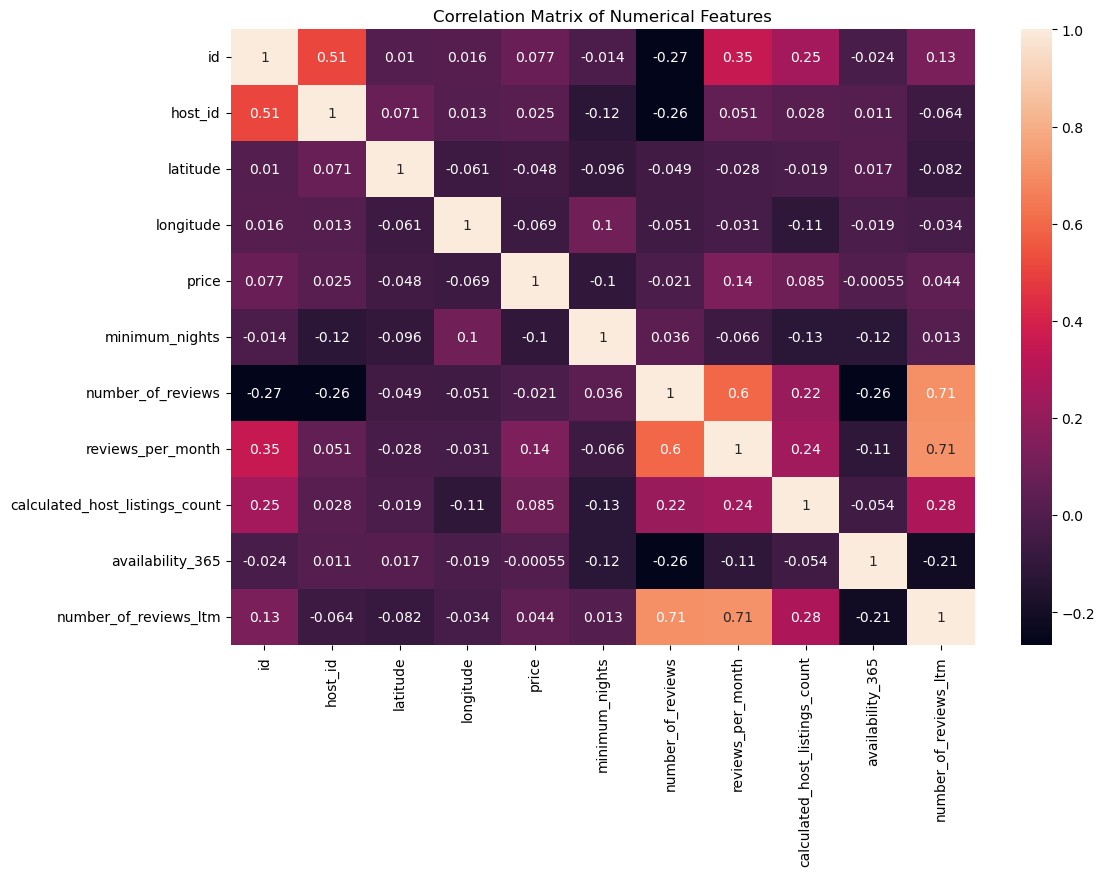

In [197]:
numerical_df = df.select_dtypes(include='number')
correlation_matrix = numerical_df.corr(method='spearman')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### **Missing Values**

In [140]:
data_loss = df.isna().sum()
loss = data_loss[data_loss>0]
percentage = (data_loss/df.shape[0])*100
missing = pd.DataFrame({"Number of Missing Data": loss, "Missing (%)": percentage})
missing.sort_values(by="Missing (%)", ascending=False)

,Number of Missing Data,Missing (%)
last_review,5790.0,36.520752
reviews_per_month,5790.0,36.520752
name,8.0,0.050460
host_name,1.0,0.006308
availability_365,NaN,0.000000
calculated_host_listings_count,NaN,0.000000
host_id,NaN,0.000000
id,NaN,0.000000
latitude,NaN,0.000000
longitude,NaN,0.000000


In [141]:
df[df['host_name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


In [142]:
df[df['name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


**Key Findings**

* Terdapat **36.5%** missing values pada kolom last_review dan reviews_per_month.
* Terdapat **8** missing values pada nama listing
* Terdapat **1** missing value pada nama host

### **Data Formatting**

In [143]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

**Key Findings**
* Tipe data pada dataset ini sebagian besar sudah sesuai, hanya saja tipe data last review perlu diubah menjadi datetime dikarenakan isi data kolom tersebut berbentuk tanggal.

### **Duplicates**

In [144]:
df['id'].duplicated().sum()

0

In [145]:
df[df['room_type'].duplicated()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
5,1704776,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,Bang Kho laen,13.697570,100.528800,Entire home/apt,1000,250,19,2017-08-03,0.17,41,365,0
6,48736,Condo with Chaopraya River View,222005,Athitaya,Rat Burana,13.685560,100.495350,Private room,1558,3,1,2014-02-03,0.01,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


In [146]:
df.describe(include='object')

,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [147]:
df[df['name'].duplicated()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
294,2682899,Luxury 3 Bedrooms Suite @BTS Phrompong,8444643,Kiattisak,Vadhana,13.736100,100.570400,Entire home/apt,9999,2,25,2022-12-07,0.24,53,358,2
317,3638924,Luxury 3 Bedrooms Suite @BTS Phrompong,8444643,Kiattisak,Vadhana,13.737570,100.569940,Entire home/apt,9999,2,24,2022-12-22,0.24,53,359,2
481,4625756,Spacious two Bedroom Apartment,5469970,Yair,Suanluang,13.721680,100.618180,Entire home/apt,1662,10,29,2019-02-04,0.30,10,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.775620,100.573460,Private room,1200,1,0,NaN,NaN,1,365,0
551,4753611,Luxury 3 Bedrooms Suite @BTS Phrompong,8444643,Kiattisak,Vadhana,13.736650,100.569830,Entire home/apt,9999,2,19,2017-05-29,0.20,53,360,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15848,790460476887978054,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.752904,100.540381,Private room,1400,1,0,NaN,NaN,14,357,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


In [148]:
df[df[['latitude','longitude']].duplicated()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
73,385130,❂Citycenter✔Subway station✔Private Bathroom4Ai...,1927968,Evan,Sathon,13.720620,100.54707,Entire home/apt,800,1,396,2020-04-30,3.02,37,361,0
80,393066,✺✺99 feet in the sky✺✺,1927968,Evan,Sathon,13.720620,100.54707,Entire home/apt,829,1,430,2022-10-01,3.39,37,334,10
89,413824,❂100% Private&Central Light EnSuite,1927968,Evan,Sathon,13.720620,100.54707,Entire home/apt,800,1,325,2020-03-14,2.67,37,358,0
122,580270,✴✴Colorful Room with Soaring Views in Center B...,1927968,Evan,Sathon,13.720620,100.54707,Entire home/apt,707,1,93,2022-11-25,0.95,37,346,11
208,2294502,✭✭✭✭Cozy Hideawy in BKK Center near MRT Lumpin...,1927968,Evan,Sathon,13.720620,100.54707,Entire home/apt,609,1,156,2022-11-20,1.45,37,312,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15826,790259260349098761,4 Beds in Mix Dormitory Room,340188343,Rachan,Vadhana,13.740168,100.55632,Shared room,1821,1,0,NaN,NaN,14,365,0
15827,790264226712277949,5 Beds in Mix Dormitory Room,340188343,Rachan,Vadhana,13.740168,100.55632,Shared room,2276,1,0,NaN,NaN,14,365,0
15828,790266011396665923,1 Bed in Mix Dormitory Room,340188343,Rachan,Vadhana,13.740168,100.55632,Shared room,455,1,0,NaN,NaN,14,365,0
15829,790278230325843023,Family Room for 4 People,340188343,Rachan,Vadhana,13.740168,100.55632,Private room,2237,1,0,NaN,NaN,14,360,0


In [149]:
df[(df['host_id']==1927968)&(df[['longitude', 'latitude']].duplicated())]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
73,385130,❂Citycenter✔Subway station✔Private Bathroom4Ai...,1927968,Evan,Sathon,13.72062,100.54707,Entire home/apt,800,1,396,2020-04-30,3.02,37,361,0
80,393066,✺✺99 feet in the sky✺✺,1927968,Evan,Sathon,13.72062,100.54707,Entire home/apt,829,1,430,2022-10-01,3.39,37,334,10
89,413824,❂100% Private&Central Light EnSuite,1927968,Evan,Sathon,13.72062,100.54707,Entire home/apt,800,1,325,2020-03-14,2.67,37,358,0
122,580270,✴✴Colorful Room with Soaring Views in Center B...,1927968,Evan,Sathon,13.72062,100.54707,Entire home/apt,707,1,93,2022-11-25,0.95,37,346,11
208,2294502,✭✭✭✭Cozy Hideawy in BKK Center near MRT Lumpin...,1927968,Evan,Sathon,13.72062,100.54707,Entire home/apt,609,1,156,2022-11-20,1.45,37,312,7
242,2394858,Cool and Comfortable MRT in the Shadows of Silom,1927968,Evan,Sathon,13.72062,100.54707,Entire home/apt,600,1,146,2022-11-19,1.36,37,358,3
253,2401426,✵✵Cool Calm and Quiet Near MRT Silom and Center✵✵,1927968,Evan,Sathon,13.72065,100.54713,Entire home/apt,736,1,120,2022-12-06,1.12,37,321,1
403,4471377,⍣Heavenly Bed⍣Sky Views⍣Cool&Quiet BKK Center/...,1927968,Evan,Sathon,13.72062,100.54707,Entire home/apt,593,1,103,2022-10-06,1.05,37,301,6
694,5594210,❂Train station☼City center☼Private Bathroom5Ai...,1927968,Evan,Sathon,13.72062,100.54707,Entire home/apt,1200,1,276,2020-10-31,2.92,37,338,0
824,6768045,Teakwood red @ Steamy Location,1927968,Evan,Sathon,13.72062,100.54707,Entire home/apt,1086,1,253,2022-12-15,2.95,37,341,2


In [150]:
df['room_type'].value_counts()

room_type
Entire home/apt    8912
Private room       5770
Hotel room          649
Shared room         523
Name: count, dtype: int64

**Key Findings**

* **kolom id tidak memiliki duplikasi.**
* Terdapat listing yang memiliki **nama, harga dan pemilik yang sama tetapi berbeda lokasi**. hal ini dapat terjadi karena pemiliki memiliki banyak properti yang serupa
* Terdapat listing yang memiliki **koordinat dan pemilik yang sama dengan nama listing dan harga yang berbeda**. melihat dari tipe ruangan, hal ini bisa terjadi apabila properti yang di rentalkan berbentuk rumah atau apartemen yang dapat di sewakan per lantai/ ruangan

**Dari pengecekan pada kolom ID dapat disimpulkan bahwa dataset ini tidak memiliki duplikasi** meskipun terdapat data yang memiliki room_type, lokasi, pemilik yang sama. hal ini sangat wajar karena:
1. room_type adalah kolom kategorikal yang hanya memiliki 4 maka akan terdapat nilai yang sama.
2. koordinat dapat terduplikasi karena banyak listing Airbnb berasal dari unit berbeda di gedung yang sama (misalnya, apartemen lantai 2 dan lantai 3). Semua unit ini bisa memiliki koordinat yang identik atau sangat mirip karena berlokasi di alamat yang sama.
3. pemilik dapat terduplikasi apabila pemilik mendaftar kan banyak properti yang dimilikinya.

### **Outlier**

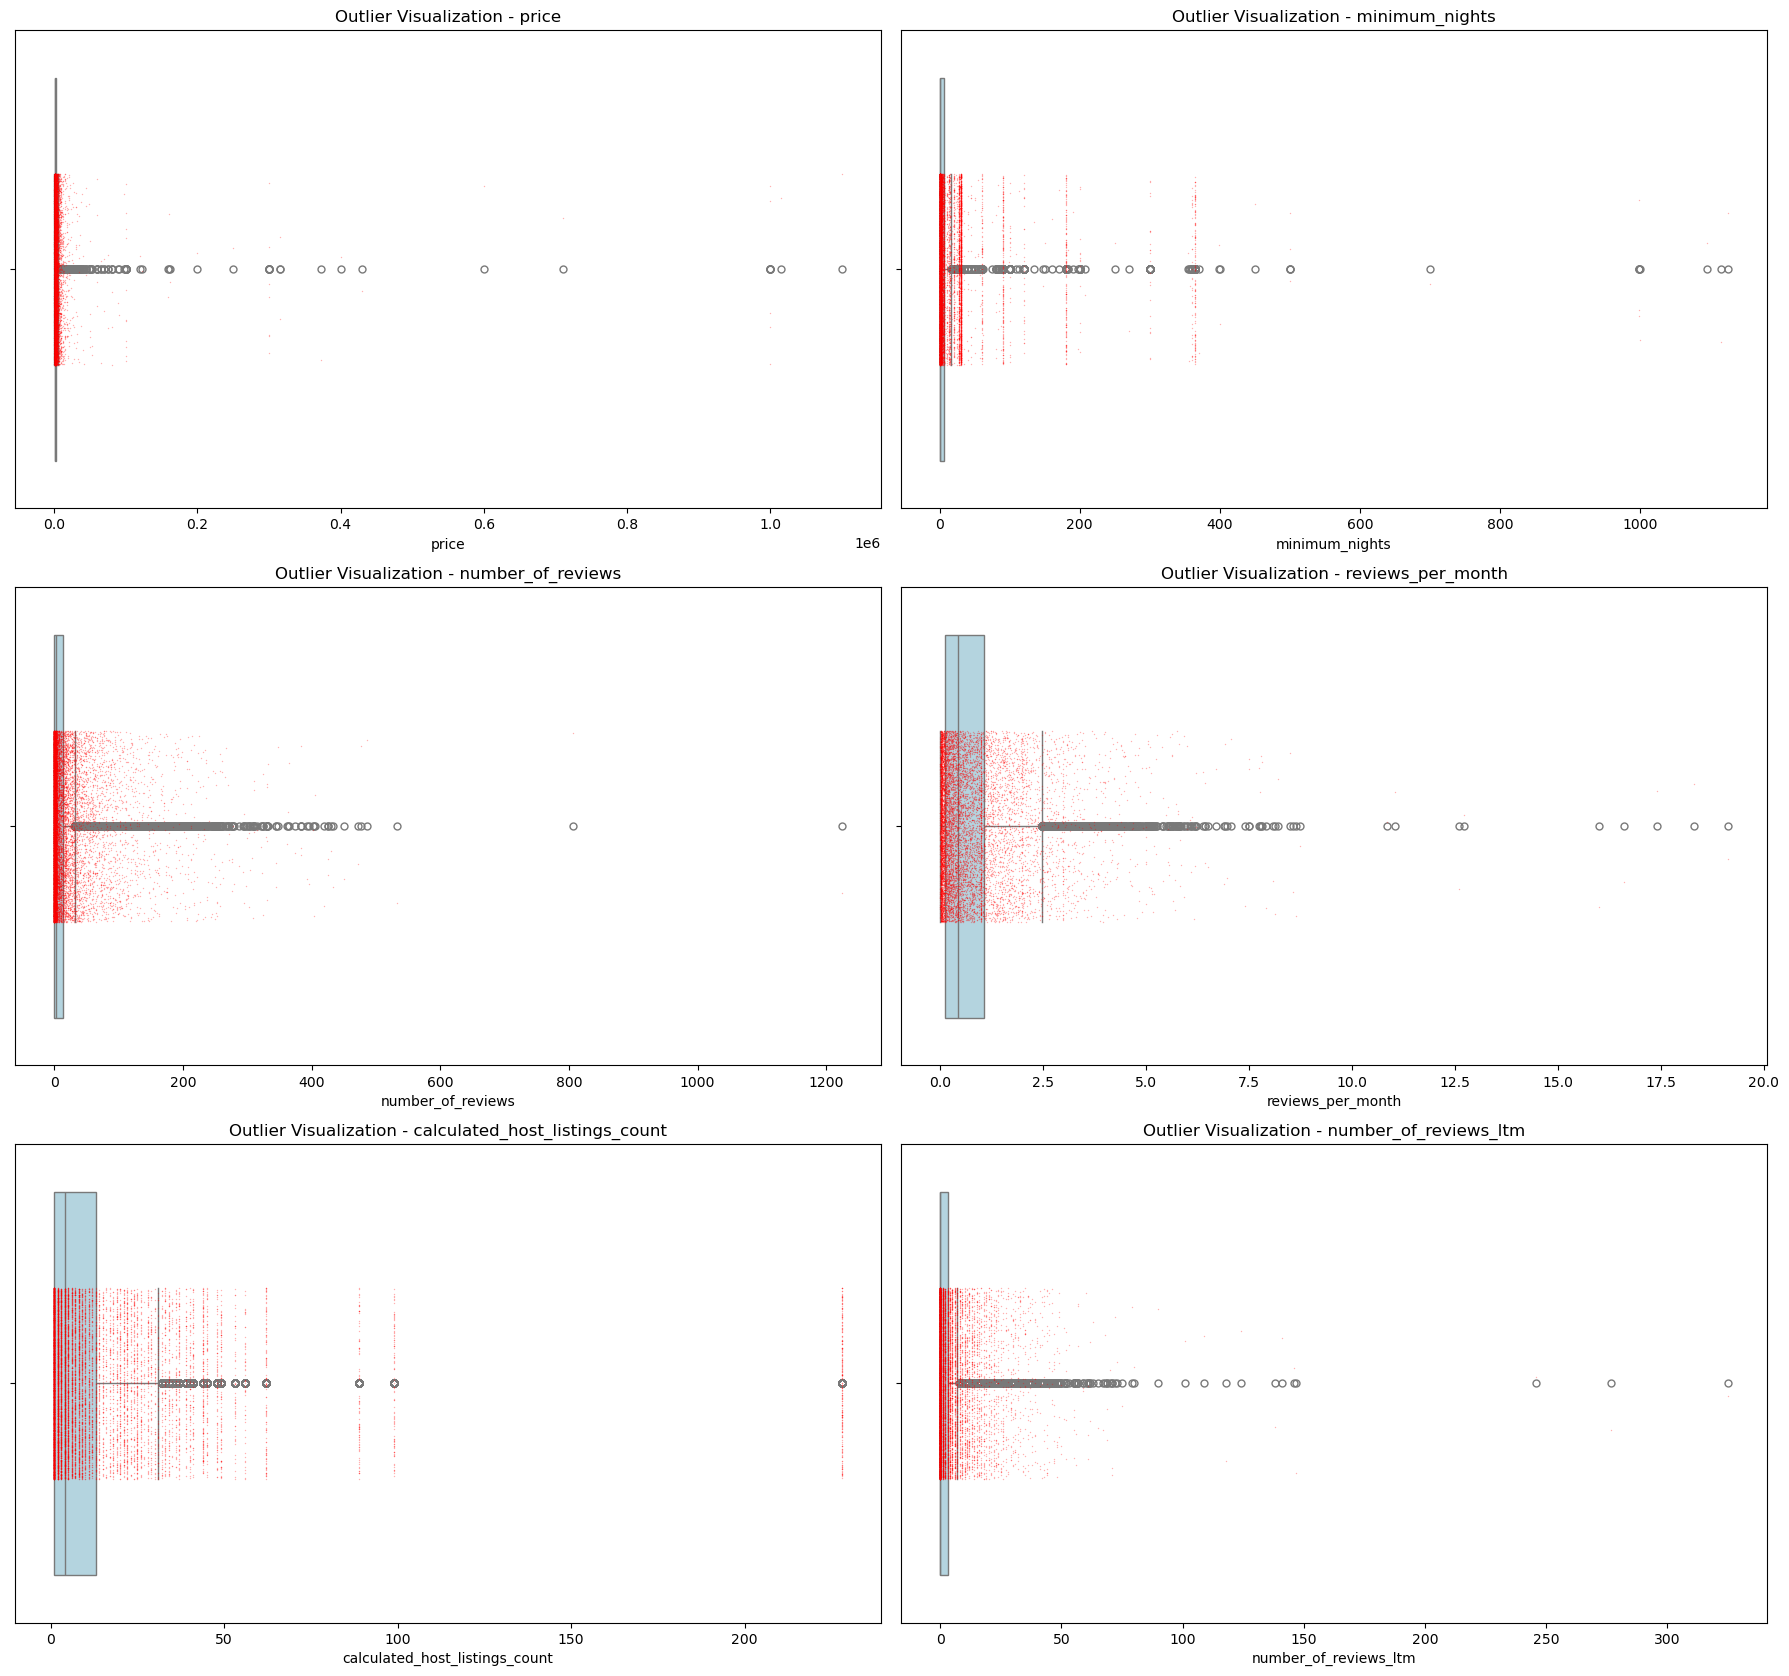

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin divisualisasikan
num_cols = [
    "price",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count",
    "number_of_reviews_ltm"
]

# Ukuran figure
plt.figure(figsize=(18, 22))

# Loop untuk membuat boxplot dan stripplot
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[col], color='lightblue', fliersize=5)
    sns.stripplot(x=df[col], color='red', size=1, jitter=0.2, alpha=0.3)
    plt.title(f'Outlier Visualization - {col}', fontsize=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()


**Key Findings**

1. **price**: Ada banyak outlier di sisi kanan (harga sangat tinggi). harga yang sangat tinggi ini dapat menjadi indikasi properti mewah yang disewakan.
2. **minimum_nights**: Terdapat outlier ekstrim, seperti listing dengan minimum stay ratusan malam karena Airbnb tidak membatasi jumlah minimum stays yang bisa diset oleh host.
3. **number_of_reviews**: Outlier tampak jelas, walau lebih masuk akal (bisa saja properti populer). Jumlah outlier yang banyak ini dapat disebabkan oleh missing data.
4. **reviews_per_month**: Ada outlier kecil, tetapi masih dalam batas wajar.
5. **calculated_host_listings_count**: Outlier menunjukkan host dengan banyak listing (>20).

### **Variable Analysis**

<Axes: title={'center': 'Number of Listings per Room Type'}, xlabel='room_type', ylabel='Count'>

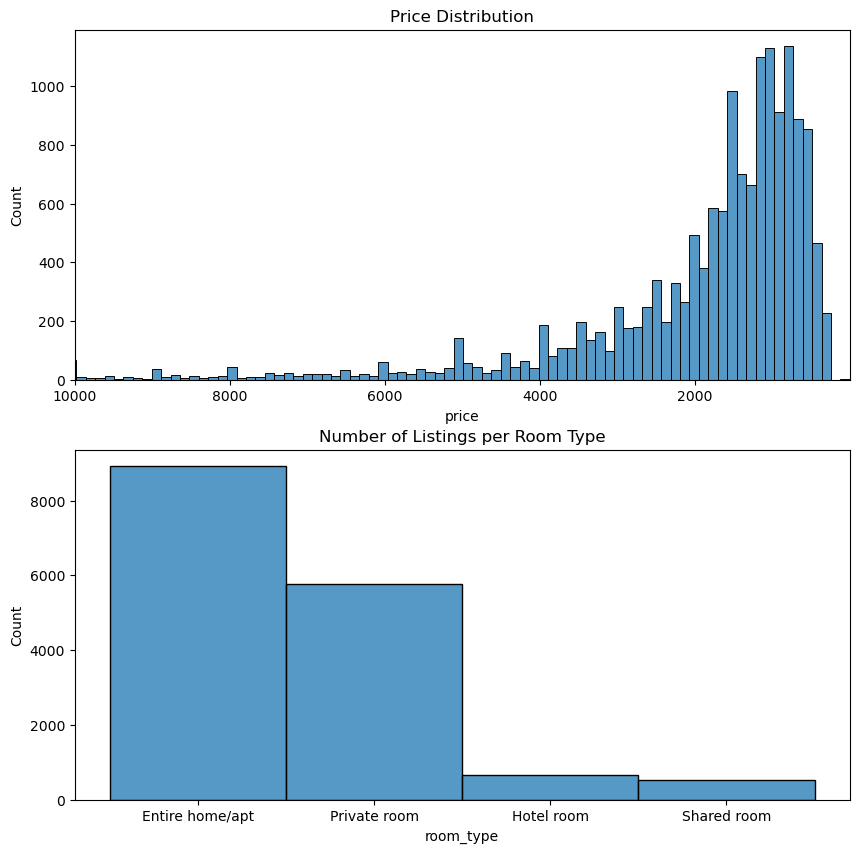

In [170]:
fig, axes = plt.subplots(2,1, figsize=(10,10))

axes[0].set_xlim(1e4)
axes[0].set_title('Price Distribution')
axes[1].set_title('Number of Listings per Room Type')

sns.histplot(x=df['price'], ax=axes[0]) #Cek distribusi harga
sns.histplot(x=df['room_type'], ax=axes[1]) #jumlah listing per tipe ruangan

<Axes: title={'center': 'Number of Reviews per Ditrict'}, xlabel='neighbourhood', ylabel='number_of_reviews'>

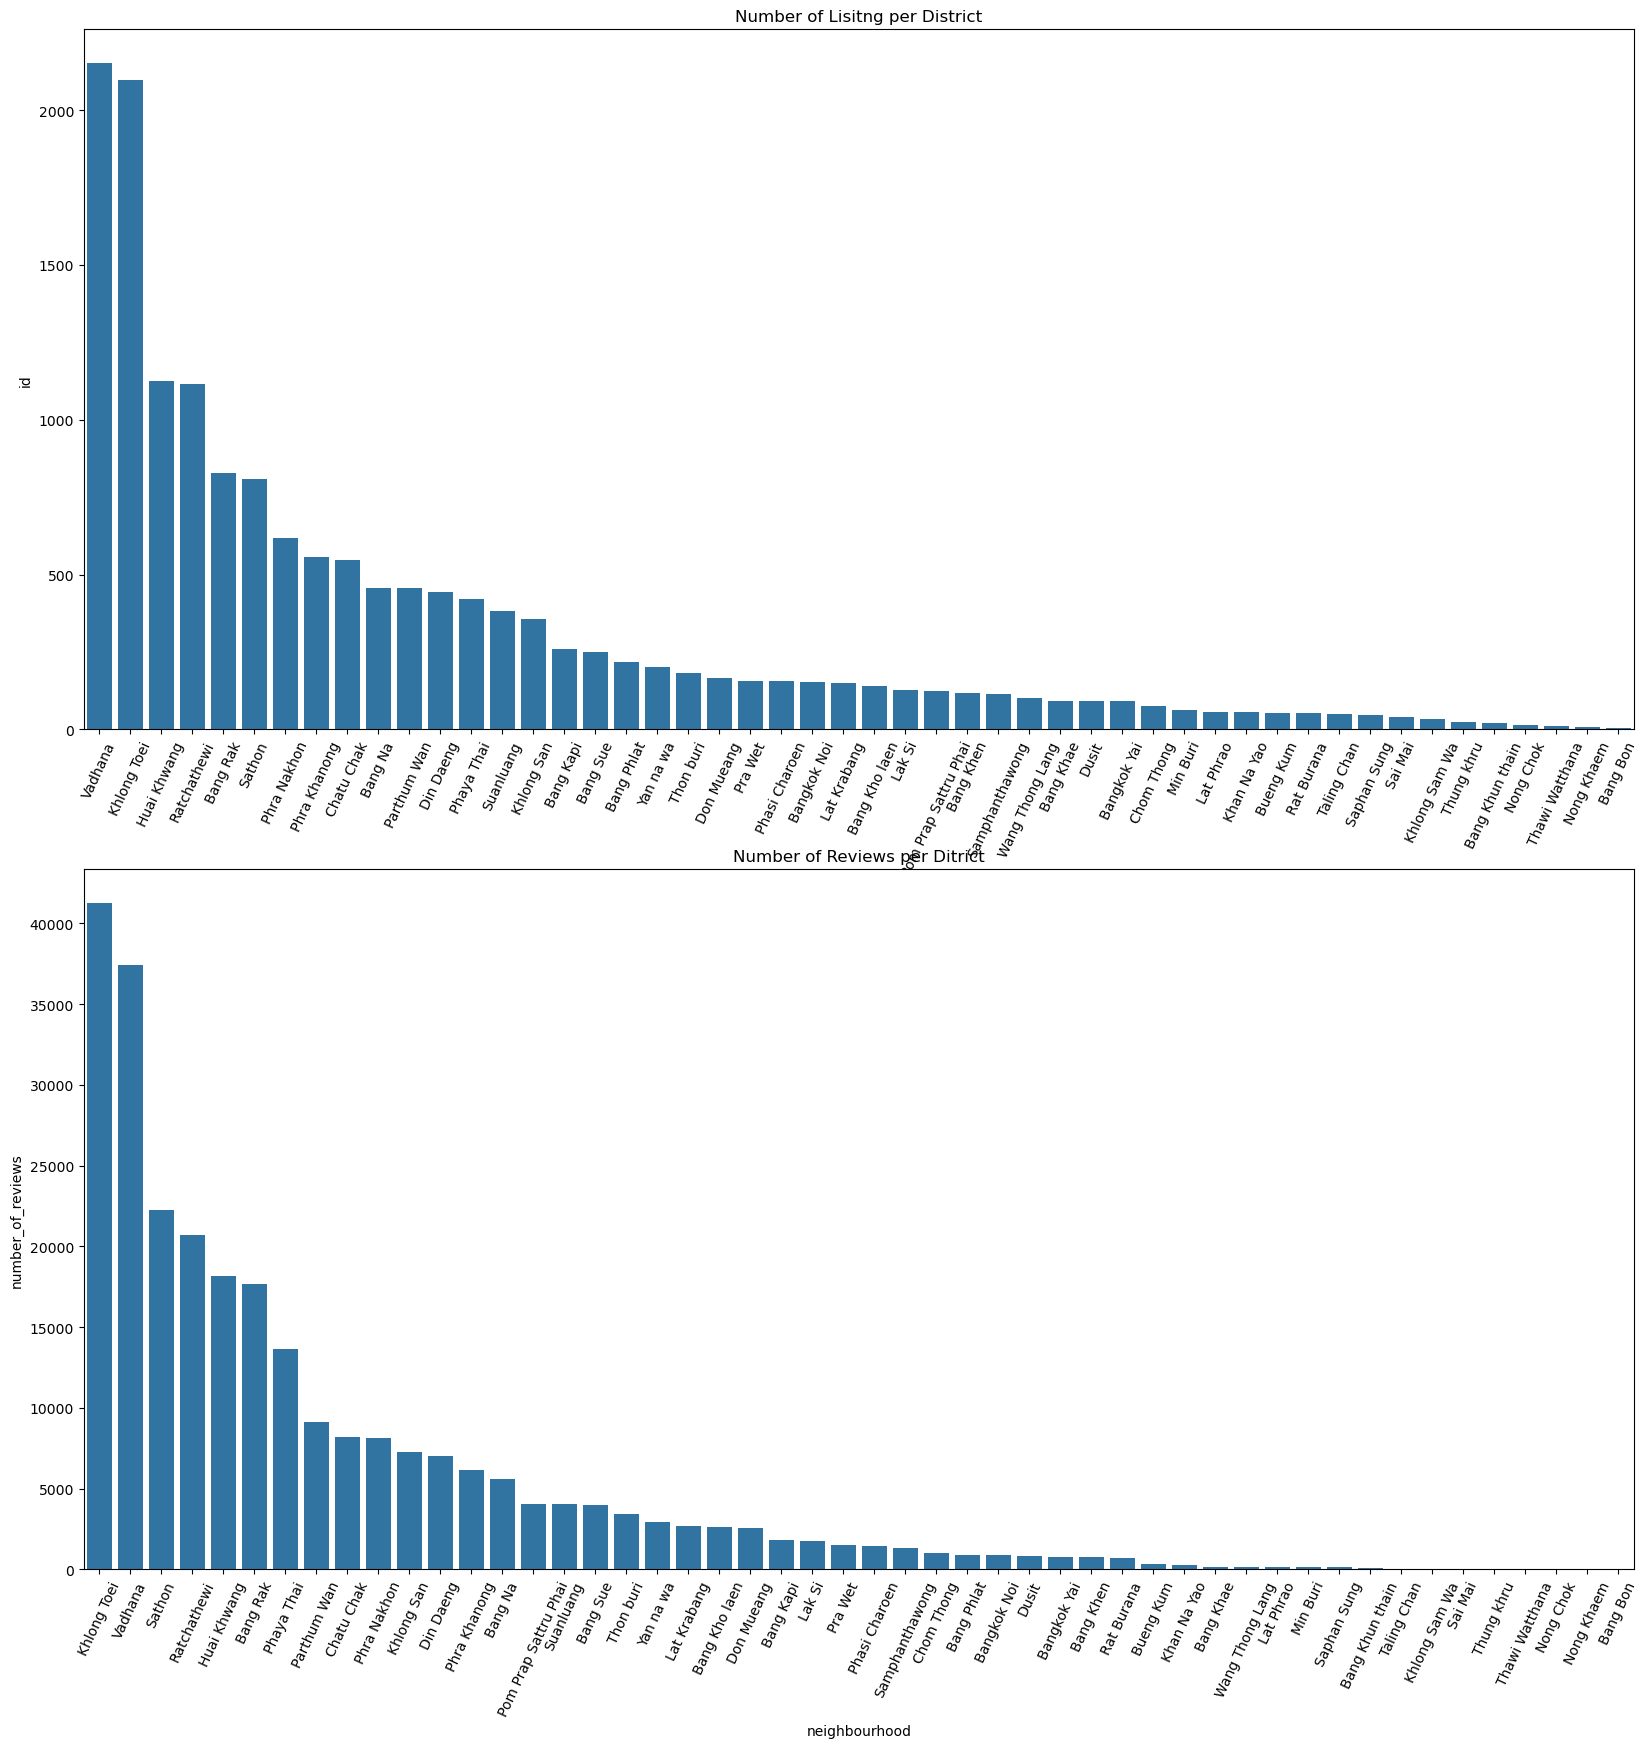

In [169]:
fig, axes = plt.subplots(2,1, figsize=(20,20))

review_per_district=pd.DataFrame(df.groupby('neighbourhood')['number_of_reviews'].sum().reset_index().sort_values(by='number_of_reviews', ascending=False))
listings_per_district =pd.DataFrame(df.groupby('neighbourhood')['id'].count().reset_index().sort_values(by='id', ascending=False))

axes[0].set_title('Number of Lisitng per District')
axes[1].set_title('Number of Reviews per Ditrict')
axes[0].tick_params(axis='x', rotation=65)
axes[1].tick_params(axis='x', rotation=65)

sns.barplot(x=listings_per_district['neighbourhood'], y=listings_per_district['id'], ax=axes[0]) #Cek jumlah listing tiap distrik
sns.barplot(x=review_per_district['neighbourhood'],y=review_per_district['number_of_reviews'], ax=axes[1])

In [171]:
listings_per_district[0:5]

,neighbourhood,id
47,Vadhana,2153
22,Khlong Toei,2097
18,Huai Khwang,1125
37,Ratchathewi,1114
8,Bang Rak,827


In [172]:
minimum_nights = pd.DataFrame(df['minimum_nights'].value_counts())
minimum_nights[0:5]

,count
minimum_nights,
1,8256
2,1729
30,1346
3,967
28,547


Dari visualisasi diatas diperoleh informasi bahwa:
- Sebagian besar listing memiliki harga <5000 , namun terdapat beberapa listing dengan harga yang lebih tinggi.
- Khlong Toei dan Sathon menjadi distrik dengan jumlah listing terbanyak.
- Entire Home/Apt menjadi tipe ruangan yang paling banyak dilisting.
- Sebagian besar listing masih bisa dipesan untuk harian hingga bulanan. Tetapi ada juga listing yang memiliki minimum_nights lebih dari 30 hari dikarenakan Airbnb tidak membatasi minimum nigths yang bisa ditentukan oleh host

### **Summary**


##### *Anomalies*

* Terdapat 1 data yang memiliki harga 0. hal ini bisa terjadi karena input error, listing tidak aktif, atau diskon spesial (sangat jarang) tetapi pada website Airbnb tidak memungkinkan pemesan mencari listing dengan harga 0. Maka dari itu **hal ini memiliki kemungkinan yang sangat kecil untuk terjadi**.
* terdapat 15 listing (0.094613 %) yang memiliki minimum_stays lebih dari 365 hari.
* Terdapat 857 data yang memiliki availability 0. Ini bisa menjadi indikasi bahwa listing sudah fully booked

##### *Missing values*

- Terdapat **36.5%** missing values pada kolom last_review dan reviews_per_month.
- Terdapat **8** missing values pada nama listing
- Terdapat **1** missing value pada nama host

##### *Data Formatting*

- Tipe data pada dataset ini sebagian besar sudah sesuai, hanya saja tipe data last review perlu diubah menjadi datetime dikarenakan isi data kolom tersebut berbentuk tanggal.

##### *Duplicates*

- **Kolom id tidak memiliki duplikasi.**
- Terdapat listing yang memiliki **nama, harga dan pemilik yang sama tetapi berbeda lokasi**. hal ini dapat terjadi karena pemiliki memiliki banyak properti yang serupa
- Terdapat listing yang memiliki **koordinat dan pemilik yang sama dengan nama listing dan harga yang berbeda**. melihat dari tipe ruangan, hal ini bisa terjadi apabila properti yang di rentalkan berbentuk rumah atau apartemen yang dapat di sewakan per lantai/ ruangan

**Dari pengecekan pada kolom ID dapat disimpulkan bahwa dataset ini tidak memiliki duplikasi** meskipun terdapat data yang memiliki room_type, lokasi, pemilik yang sama. hal ini sangat wajar karena:
1. room_type adalah kolom kategorikal yang hanya memiliki 4 maka akan terdapat nilai yang sama.
2. koordinat dapat terduplikasi karena banyak listing Airbnb berasal dari unit berbeda di gedung yang sama (misalnya, apartemen lantai 2 dan lantai 3). Semua unit ini bisa memiliki koordinat yang identik atau sangat mirip karena berlokasi di alamat yang sama.
3. pemilik dapat terduplikasi apabila pemilik mendaftar kan banyak properti yang dimilikinya.

##### *Outlier*

1. **price**: Ada banyak outlier di sisi kanan (harga sangat tinggi). harga yang sangat tinggi ini dapat menjadi indikasi properti mewah yang disewakan.
2. **minimum_nights**: Terdapat outlier ekstrim, seperti listing dengan minimum stay ratusan malam karena Airbnb tidak membatasi jumlah minimum stays yang bisa diset oleh host.
3. **number_of_reviews**: Outlier tampak jelas, walau lebih masuk akal (bisa saja properti populer). Jumlah outlier yang banyak ini dapat disebabkan oleh missing data.
4. **reviews_per_month**: Ada outlier kecil, tetapi masih dalam batas wajar.
5. **calculated_host_listings_count**: Outlier menunjukkan host dengan banyak listing (>20).

##### *Variable Analysis*

Dari visualisasi diatas diperoleh informasi bahwa:
- Sebagian besar listing memiliki harga <5000 , namun terdapat beberapa listing dengan harga yang lebih tinggi.

- Vadhana dan Khlong Toei menjadi distrik dengan jumlah listing terbanyak. hal ini dikarenakan kedua distrik ini berada di pusat kota bangkok dan memiliki beberapa tempat wisata dan juga area perkantoran. Jumlah listing Airbnb yang tinggi di distrik Vadhana dan Khlong Toei menunjukkan hubungan langsung dengan popularitas kedua area ini di kalangan turis. Fasilitas modern, akses transportasi yang mudah, dan beragam pilihan akomodasi menjadikan kedua distrik ini pilihan utama bagi wisatawan yang mencari kenyamanan dan pengalaman lokal di Bangkok.

- Entire Home/Apt menjadi tipe ruangan yang paling banyak dilisting. Jumlah listing Airbnb berjenis apartemen di Bangkok lebih banyak karena apartemen mendominasi lanskap properti kota, menawarkan fasilitas modern yang sesuai dengan kebutuhan turis, serta lebih mudah dikelola untuk sewa jangka pendek. Kombinasi antara permintaan wisatawan dan kemudahan operasional menjadikan apartemen sebagai tipe properti utama di platform seperti Airbnb, khususnya di kawasan populer seperti Vadhana dan Khlong Toei.

- Sebagian besar listing masih bisa dipesan untuk harian hingga bulanan. Tetapi ada juga listing yang memiliki minimum_nights lebih dari 30 hari dikarenakan Airbnb tidak membatasi minimum nigths yang bisa ditentukan oleh host

##### ***Solusi***:

* Hapus data yang memiliki harga 0 karena tidak ada listing yang memiliki price 0 pada website Airbnb
* last_review yang missing bisa terjadi karena pemesan belum atau tidak mereview listing. oleh karena itu missing value pada last_review dapat diubah menjadi NaT
* reviews_per_month missing bisa terjadi karena tidak ada reviews yang terjadi. maka dari itu, missing value pada reviews_per_month dapat diubah menjadi 0 atau Null
* merubah tipe data last_review menjadi datetime dikarenakan isi data kolom tersebut berbentuk tanggal.
* Dikarenakan terdapat 15 listing yang memiliki minimum_nights lebih dari 365 hari, maka listing yang memiliki minimum_stays lebih dari 365 dapat di drop melihat dari jumlah datanya yang tidak banyak.

## **Data Preprocessing**

In [159]:
df_copy= df.copy()

#### **Handling Outliers**

In [160]:
# Menghapus outlier dari kolom 'price' 
Q1 = df_copy['price'].quantile(0.25)
Q3 = df_copy['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_copy = df_copy[(df_copy['price'] >= lower_bound) & (df_copy['price'] <= upper_bound)]

In [161]:
# # Menghapus outlier dari kolom 'minimum_nights' 
# Q1 = df_copy['minimum_nights'].quantile(0.25)
# Q3 = df_copy['minimum_nights'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# df_copy = df_copy[(df_copy['minimum_nights'] >= lower_bound) & (df_copy['minimum_nights'] <= upper_bound)]

In [162]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


In [163]:
df_copy.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.445100e+04,1.445100e+04,14451.000000,14451.000000,14451.000000,14451.000000,14451.000000,9303.000000,14451.000000,14451.000000,14451.000000
mean,1.578093e+17,1.528188e+08,13.745594,100.560006,1563.612553,15.382257,17.089959,0.814236,14.045464,243.197218,3.517404
std,2.946644e+17,1.312482e+08,0.043895,0.051572,942.617290,49.161875,41.491925,1.093349,30.968935,125.484660,8.981374
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.087790e+07,4.026086e+07,13.719404,100.529155,861.500000,1.000000,0.000000,0.120000,1.000000,136.000000,0.000000
50%,3.494924e+07,1.211513e+08,13.738910,100.561550,1300.000000,1.000000,2.000000,0.440000,4.000000,305.000000,0.000000
75%,5.250092e+07,2.354447e+08,13.760355,100.585880,2000.000000,7.000000,14.000000,1.060000,13.000000,360.000000,3.000000
max,7.907510e+17,4.926659e+08,13.953540,100.923440,4720.000000,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000
